In [7]:
import numpy as np

from models.UnconstrainedHindsightModel import UnconstrainedHindsightModel
#Auto reload
%reload_ext autoreload
%autoreload 2

from utils.Result import Result
from models.DeterministicModel import DeterministicModel
from models.HAPDModel import HAPDModel
from models.HindsightModel import HindsightModel
from utils.constants import *

Model UnconstrainedHindsight
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
3453659.2897058823
173.25


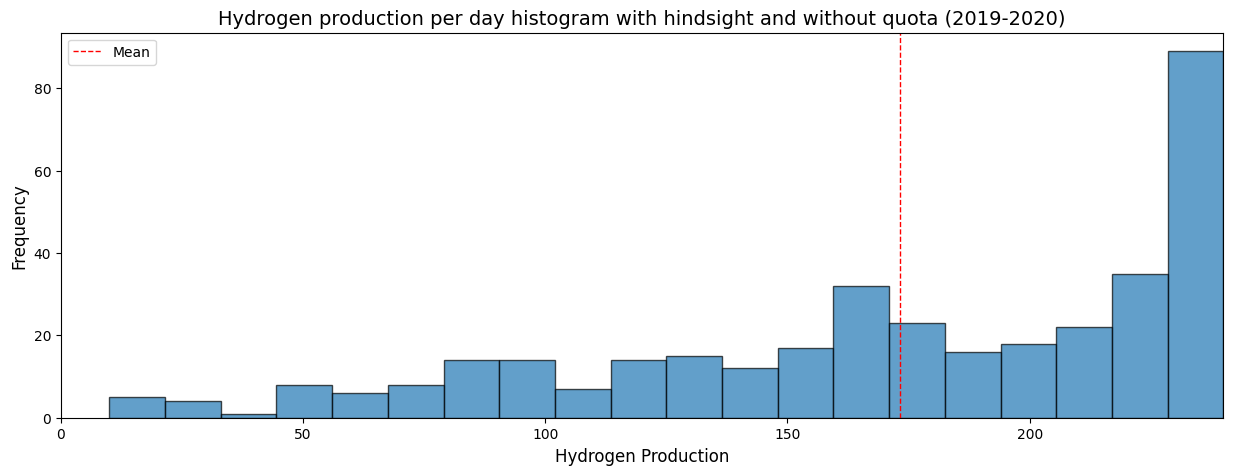

In [9]:
hindsight_unconstrained_model = UnconstrainedHindsightModel('UnconstrainedHindsight', HOURS_PER_YEAR)
results = hindsight_unconstrained_model.evaluate(HOURS_PER_YEAR)


print(results.get_total_objective())
print(results.get_average_hydrogen_production_per_day())
results.plot_hydrogen_production_per_day_histogram(title='Hydrogen production per day histogram with hindsight and without quota (2019-2020)')

Model UnconstrainedHindsight_22_23
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
5231224.3407759685
61.416666666666664


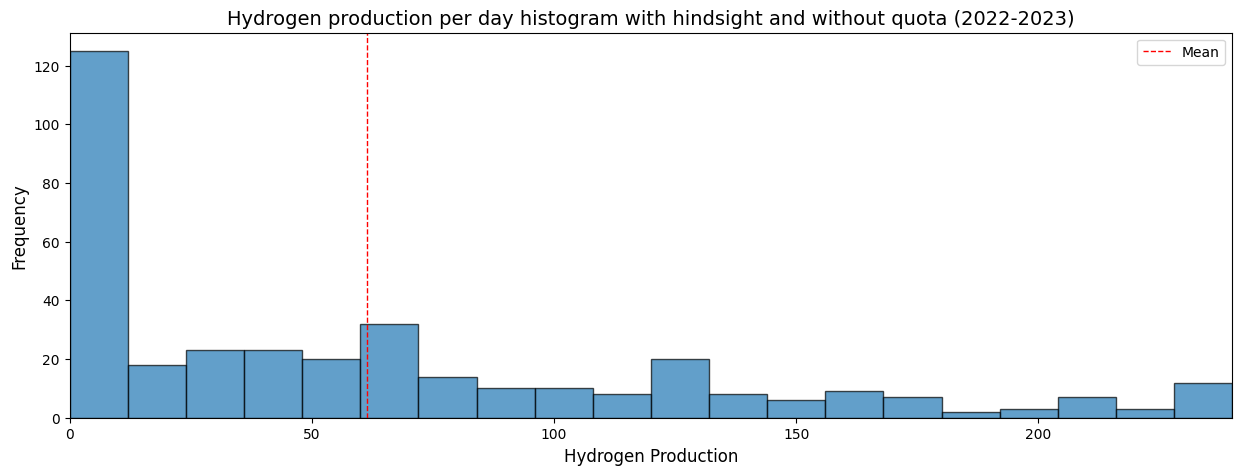

In [10]:
hindsight_unconstrained_model = UnconstrainedHindsightModel('Unconstrained_Hindsight_22_23', HOURS_PER_YEAR, datafile='../data/2022_2023/2022_2023_data.csv')
results = hindsight_unconstrained_model.evaluate(HOURS_PER_YEAR)

print(results.get_total_objective())
print(results.get_average_hydrogen_production_per_day())
results.plot_hydrogen_production_per_day_histogram(title='Hydrogen production per day histogram with hindsight and without quota (2022-2023)')

Model Hindsight_single_price_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Model Deterministic_single_price_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Model HAPD_single_price_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (4).

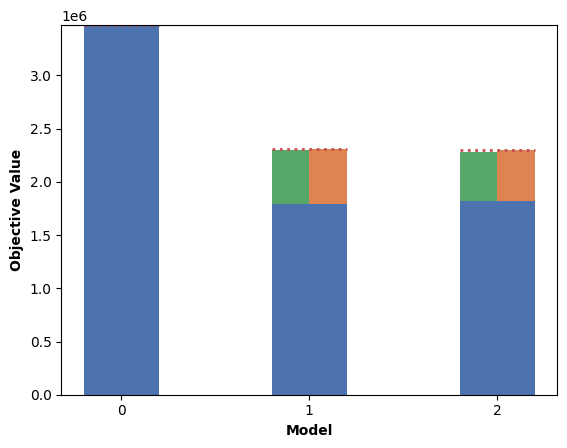

In [6]:
for h_min in [50, 100, 150, 200]:
    hindsight_model = HindsightModel.load(f'Hindsight_single_price_hmin{h_min}',HindsightModel)
    deterministic_model = DeterministicModel.load(f'Deterministic_single_price_hmin{h_min}', DeterministicModel)
    hapd_model = HAPDModel.load(f'HAPD_single_price_hmin{h_min}',HAPDModel)
    models = [hindsight_model, deterministic_model, hapd_model]
    results = []
    
    for model in models:
        result_original = model.load_results('original')
        result_rule_based = model.load_results('rule_based_adj')
        result_MPC = model.load_results('MPC_adj')
        result_best = model.load_results('best_adj')
        results.append([result_original, result_rule_based, result_MPC, result_best])
    Result.plot_objectives(results, ['Original', 'Rule based', 'MPC', 'Best'], f'Objectives for each model (H_Min = {h_min})')

In [19]:
hapd_model = HAPDModel.load('HAPD_model_22_23_hmin200',HAPDModel)
results_original = hapd_model.load_results('original')
results_rule_based = hapd_model.load_results('rule_based_adj')
results_MPC = hapd_model.load_results('MPC_adj')
results_best = hapd_model.load_results('best_adj')
print(results_original.get_total_objective())

Model HAPD_model_22_23_hmin200
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
59810.51716013498


Model Hindsight_hmin50_22_23
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Model Deterministic_hmin50_22_23
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Model HAPD_hmin50_22_23
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Weights successfully saved 
Hindsight_hmin50_22_23
7143813.900980392
Deterministic_hmin50_22_23
3027240.932527911
HAPD_hmin50_22_23
5862250.860003419
Model: Hindsight_hmin50_22_23 done
Model: Deterministic_hmin50_22_23 done
Model: HAPD_hmin50_22_23 done
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.


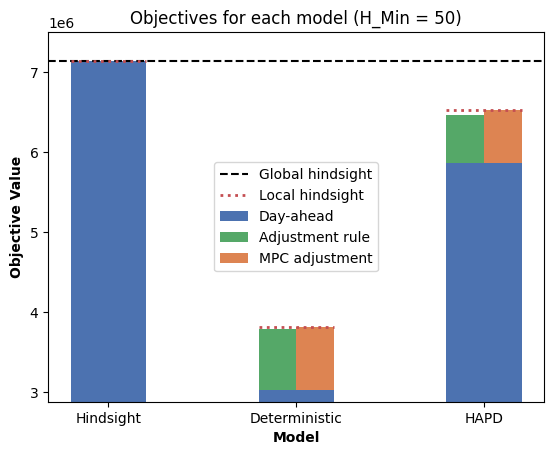

Model Hindsight_hmin100_22_23
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model Deterministic_hmin100_22_23
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model HAPD_hmin100_22_23
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Weights successfully saved 
Hindsight_hmin100_22_23
7111242.000980391
Deterministic_hmin100_22_23
2376037.4325279114
HAPD_hmin100_22_23
5891656.141965212
Model: Hindsight_hmin100_22_23 done
Model: Deterministic_hmin100_22_23 done
Model: HAPD_hmin100_22_23 done
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.


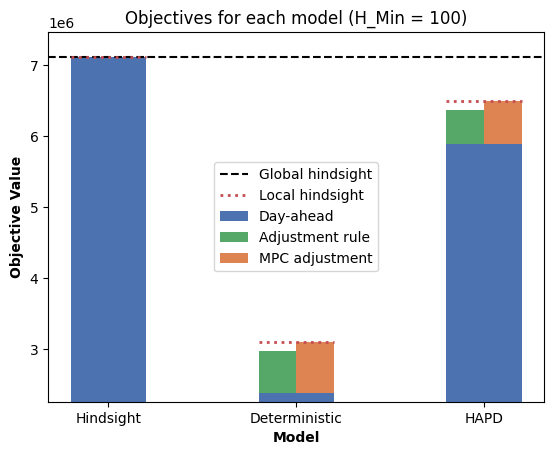

Model Hindsight_hmin150_22_23
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Model Deterministic_hmin150_22_23
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Model HAPD_hmin150_22_23
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640


KeyboardInterrupt: 

In [7]:
for h_min in [50, 100, 150, 200]:
    hindsight_model = HindsightModel.load(f'Hindsight_model_22_23_hmin{h_min}',HindsightModel)
    deterministic_model = DeterministicModel.load(f'Deterministic_model_hmin{h_min}', DeterministicModel)
    hapd_model = HAPDModel.load(f'HAPD_model_22_23_hmin{h_min}',HAPDModel)
    hapd_model.train(training_length=HOURS_PER_YEAR)
    models = [hindsight_model, deterministic_model, hapd_model]
    results = []

    for model in models:
        result = model.evaluate(HOURS_PER_YEAR)
        print(model.name)
        print(result.get_total_objective())
        results.append(result)
        
    total_results = []
    for model,result in zip(models, results):
        aux = [result, model.rule_based_adjustment(result), model.MPC_adjustment(result),model.best_adjustment(result)]
        total_results.append(aux)
        print(f"Model: {model.name} done")

    for model, result in zip(models, total_results):
        model.save_results(result[0], 'original')
        model.save_results(result[1], 'rule_based_adj')
        model.save_results(result[2], 'MPC_adj')
        model.save_results(result[3], 'best_adj')
    Result.plot_objectives(total_results, ['Hindsight', 'Deterministic', 'HAPD'],f'Objectives for each model (H_Min = {h_min})')

In [3]:
deterministic_models = [DeterministicModel('Deterministic_hmin50_22_23', HOURS_PER_YEAR, h_min=50, datafile='../data/2022_2023/2022_2023_data.csv'), DeterministicModel('Deterministic_hmin100_22_23', HOURS_PER_YEAR, h_min=100, datafile='../data/2022_2023/2022_2023_data.csv')]

deterministic_results = []

for model in deterministic_models:
    results = [model.load_results(flag) for flag in ['original', 'rule_based_adj', 'MPC_adj', 'best_adj']]
    deterministic_results.append(results)    

Model Deterministic_hmin50_22_23
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Model Deterministic_hmin100_22_23
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.


In [4]:
hindsight_models = [HindsightModel.load('Hindsight_hmin50_22_23', HindsightModel), HindsightModel.load('Hindsight_hmin100_22_23', HindsightModel)]

hindsight_results = []

for model in hindsight_models:
    results = [model.load_results(flag) for flag in ['original', 'rule_based_adj', 'MPC_adj', 'best_adj']]
    hindsight_results.append(results)    

Model Hindsight_hmin50_22_23
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Model Hindsight_hmin100_22_23
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.


In [5]:
HAPD_models = [HAPDModel.load('HAPD_hmin50_22_23', HAPDModel), HAPDModel.load('HAPD_hmin100_22_23', HAPDModel)]

HAPD_results = []

for model in HAPD_models:
    results = [model.load_results(flag) for flag in ['original', 'rule_based_adj', 'MPC_adj', 'best_adj']]
    HAPD_results.append(results)    

Model HAPD_hmin50_22_23
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Model HAPD_hmin100_22_23
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.


3027240.932527911
78.22222222222223


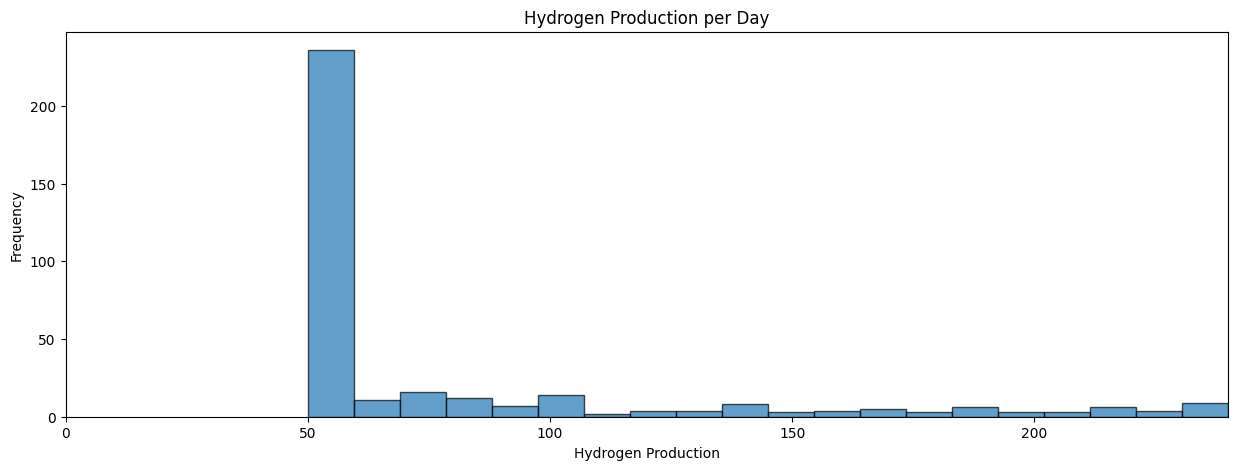

2376037.4325279114
114.41666666666667


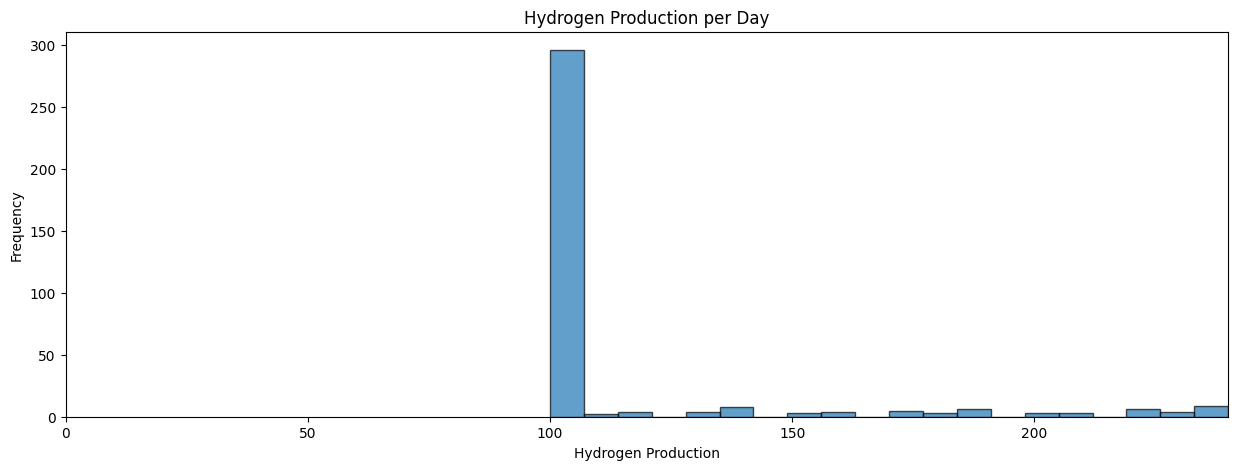

In [21]:
for results in deterministic_results:
    result = results[0]
    print(result.get_total_objective())
    print(result.get_average_hydrogen_production_per_day())
    result.plot_hydrogen_production_per_day_histogram()

7143813.900980392
153.72222222222223


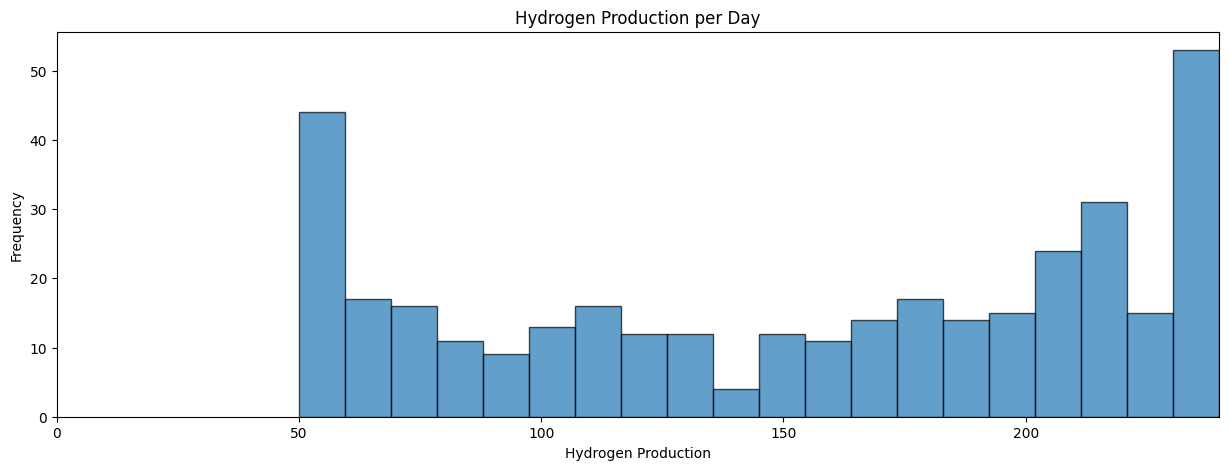

7111242.000980391
163.91666666666666


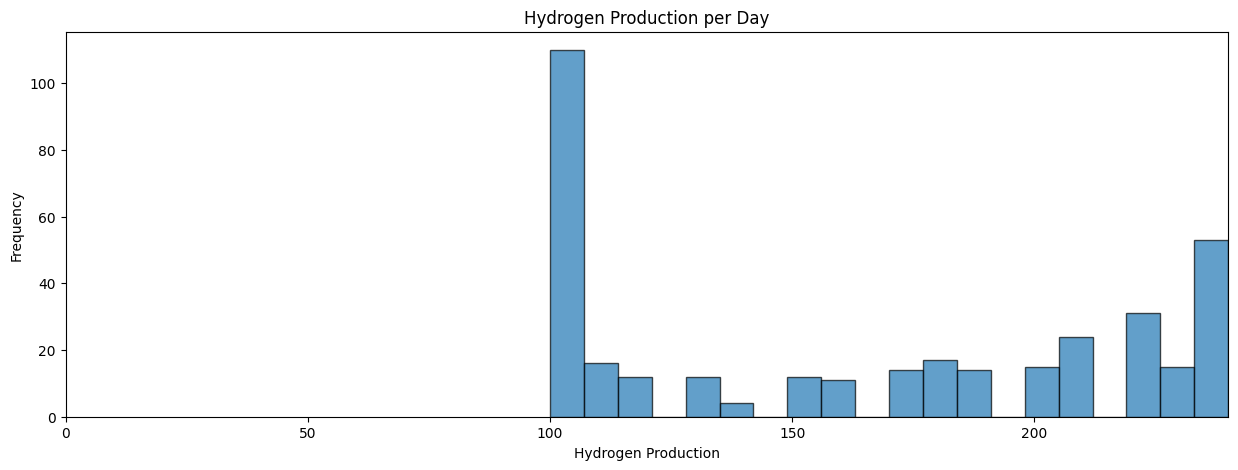

In [22]:
for results in hindsight_results:
    result = results[0]
    print(result.get_total_objective())
    print(result.get_average_hydrogen_production_per_day())
    result.plot_hydrogen_production_per_day_histogram()

5862250.860003419
55.32173537202531


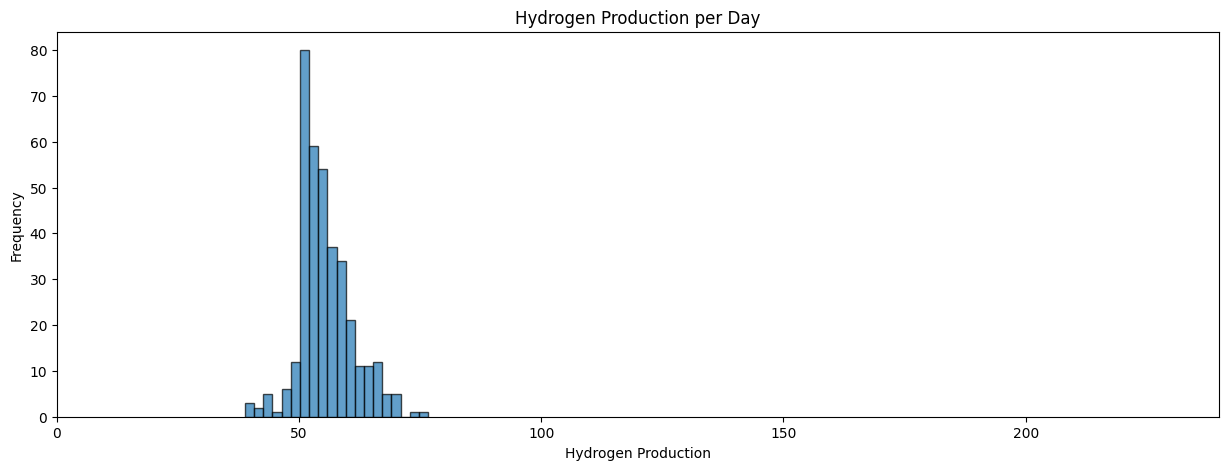

6467867.549459293
157.04242710061592


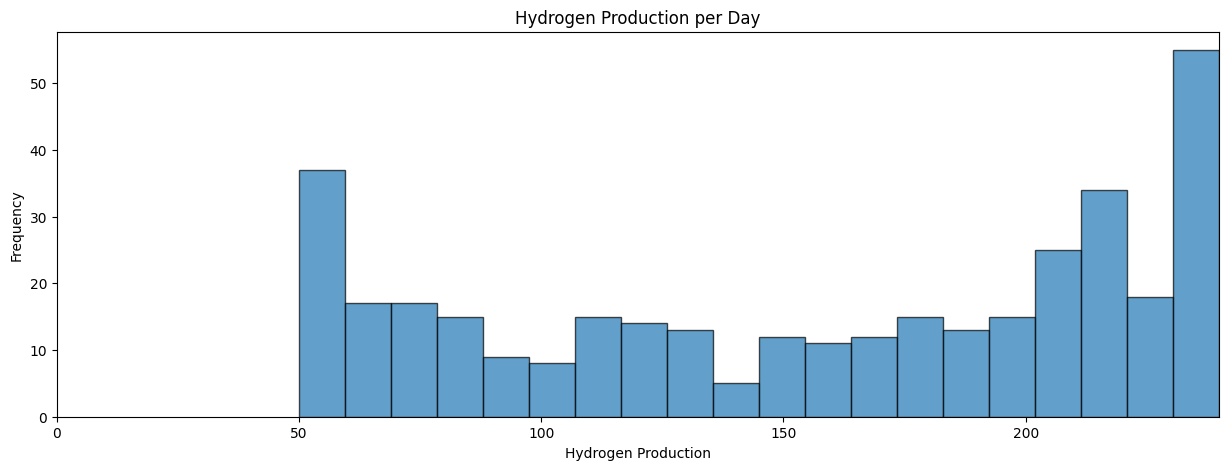

6527052.894640415
153.72222222222223


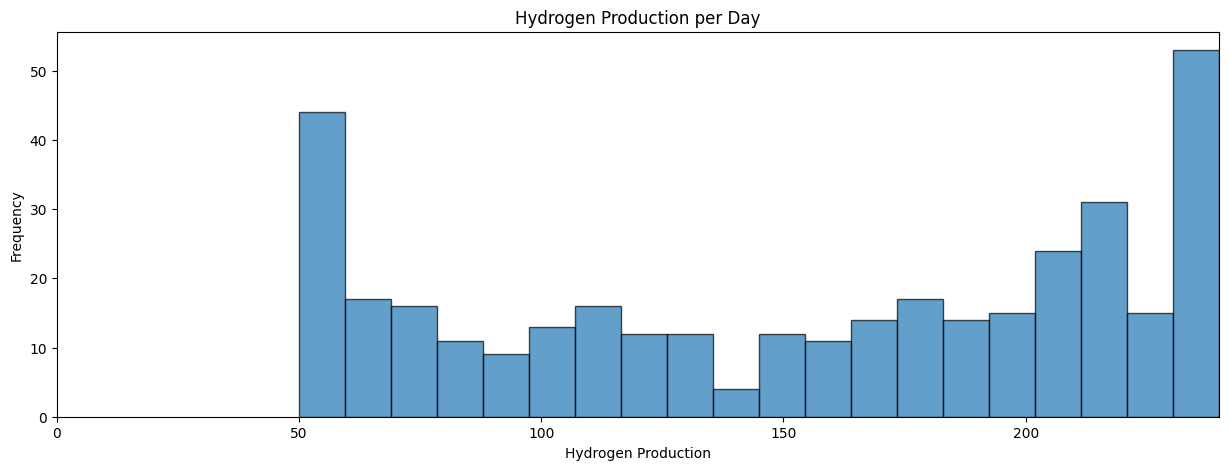

6527052.894640415
153.72222222222223


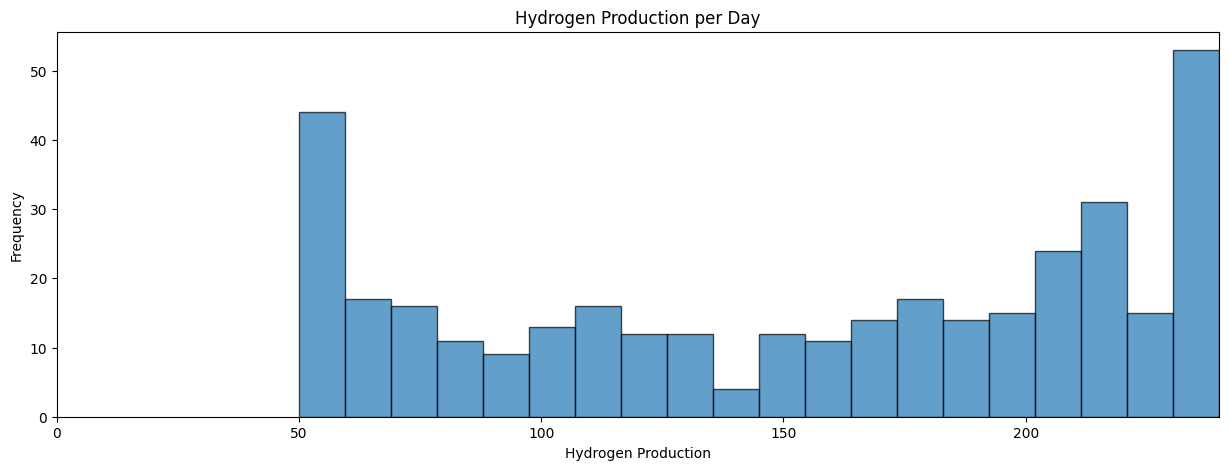

5891656.141965212
101.14374666313591


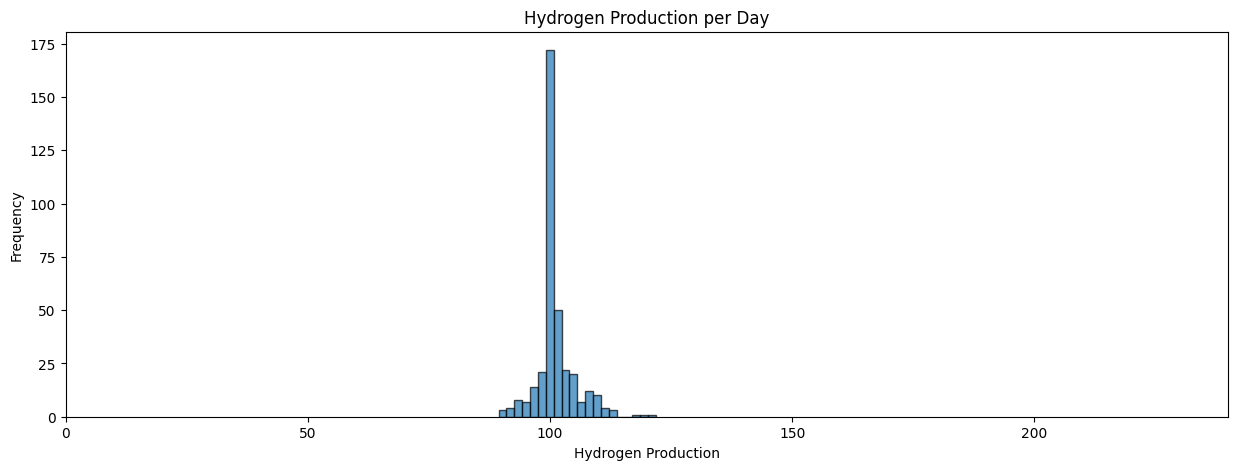

6362124.524265478
168.60656248132267


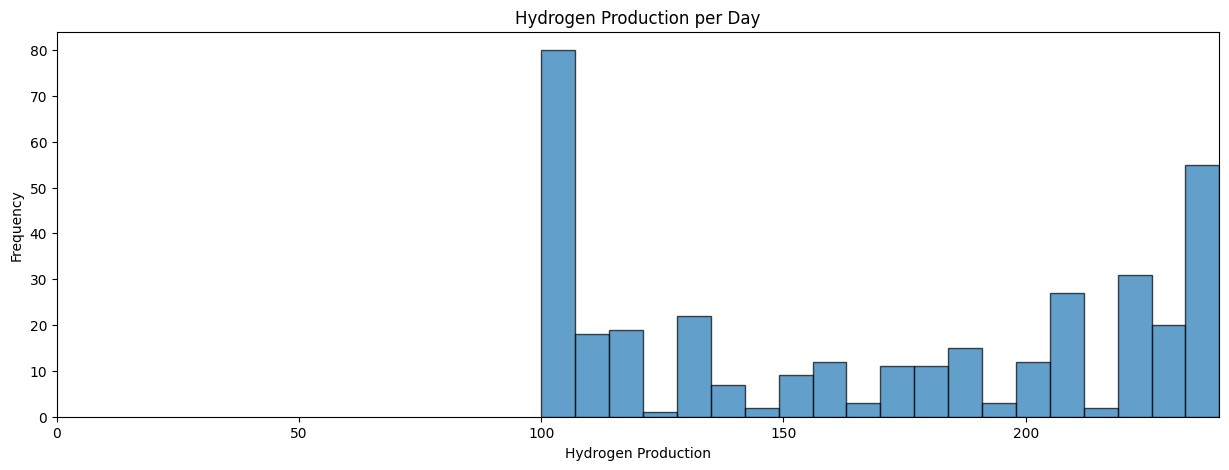

6494480.994640416
163.91666666666666


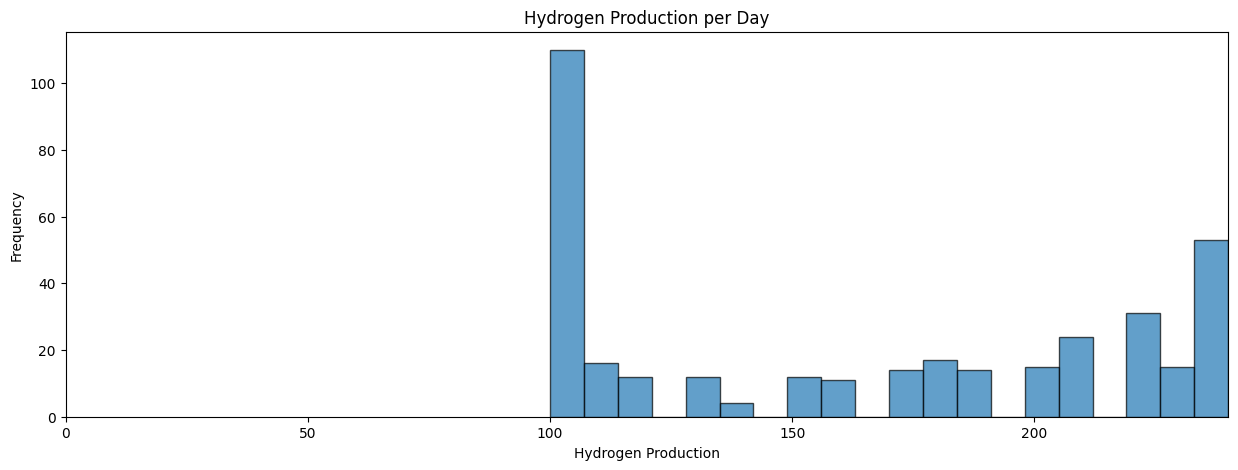

6494480.994640416
163.91666666666666


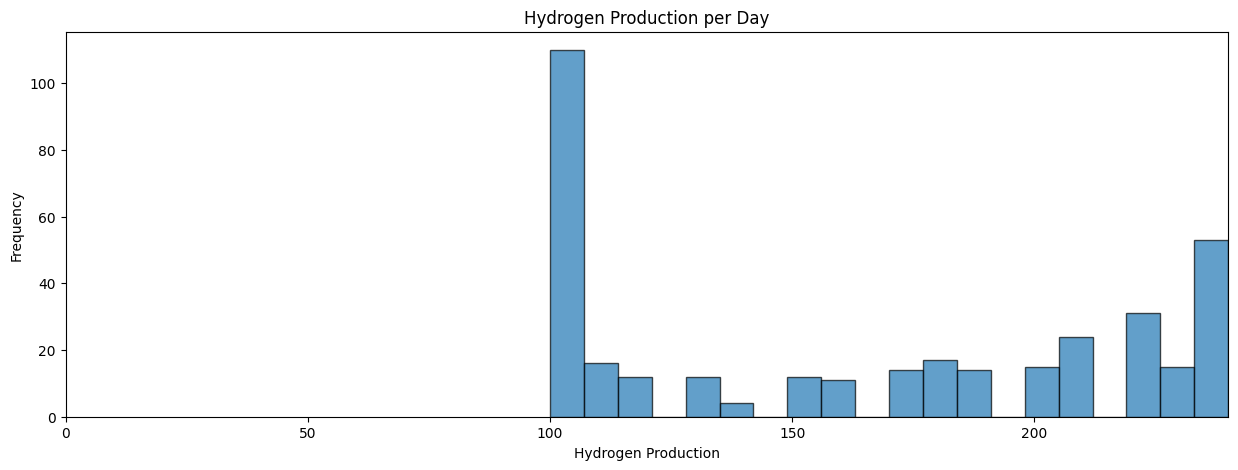

In [20]:
for results in HAPD_results:
    result = results[0]
    print(result.get_total_objective())
    print(result.get_average_hydrogen_production_per_day())
    result.plot_hydrogen_production_per_day_histogram()
    print(results[1].get_total_objective())
    print(results[1].get_average_hydrogen_production_per_day())
    results[1].plot_hydrogen_production_per_day_histogram()
    print(results[2].get_total_objective())
    print(results[2].get_average_hydrogen_production_per_day())
    results[2].plot_hydrogen_production_per_day_histogram()
    print(results[3].get_total_objective())
    print(results[3].get_average_hydrogen_production_per_day())
    results[3].plot_hydrogen_production_per_day_histogram()